In [150]:
import os
import pandas as pd
import pandas.api.types as ptypes
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

In [151]:
# load dataset
df_original = pd.read_csv('Churn_Modelling.csv')
df = df_original

In [152]:
# print top 5 row
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [153]:
# describe dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [154]:
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 10000 rows and 14 columns


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [156]:
# check for col
print("\n Column name",df.columns)


 Column name Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [157]:
# check for datatype
print("\n",df.dtypes)


 RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [158]:
# check for null value
print("\n\n",df.isnull().sum())



 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [159]:
# calculating  sum of null values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [160]:
# check fo duplicate data
print("\n check for duplicate \n",df.duplicated().sum())
           


 check for duplicate 
 0


In [161]:
# create dummy Variable for Purchased
df.replace(['yes','no'],[1,0],inplace=True)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [162]:
# drop unwanted col
df= df.drop(['Surname'], axis=1)
df.dtypes

RowNumber            int64
CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [163]:
# dummies for dataframe
df = pd.get_dummies(df)

In [164]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [165]:
# check for min values
df.min()

RowNumber                   1.00
CustomerId           15565701.00
CreditScore               350.00
Age                        18.00
Tenure                      0.00
Balance                     0.00
NumOfProducts               1.00
HasCrCard                   0.00
IsActiveMember              0.00
EstimatedSalary            11.58
Exited                      0.00
Geography_France            0.00
Geography_Germany           0.00
Geography_Spain             0.00
Gender_Female               0.00
Gender_Male                 0.00
dtype: float64

In [166]:
# replace min values with mean
df.replace(0.0, df.mean(),inplace= True)

In [167]:
# check for min values 
df.min()

RowNumber            1.000000e+00
CustomerId           1.556570e+07
CreditScore          3.500000e+02
Age                  1.800000e+01
Tenure               1.000000e+00
Balance              3.768690e+03
NumOfProducts        1.000000e+00
HasCrCard            7.055000e-01
IsActiveMember       5.151000e-01
EstimatedSalary      1.158000e+01
Exited               2.037000e-01
Geography_France     5.014000e-01
Geography_Germany    2.509000e-01
Geography_Spain      2.477000e-01
Gender_Female        4.543000e-01
Gender_Male          5.457000e-01
dtype: float64

In [168]:
# check for correlation
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006114,-0.008264,0.007246,0.000599,0.012044,-0.005988,-0.016571,0.008590,-0.000044,-0.009905,-0.018196,0.018196
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.013273,-0.012160,0.016972,-0.014025,0.001665,0.015271,-0.006248,-0.004049,-0.003097,0.007800,0.002641,-0.002641
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.002105,0.002614,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780,0.002857,-0.002857
Age,0.000783,0.009497,-0.003965,1.000000,-0.008777,0.015149,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685,0.027544,-0.027544
Tenure,-0.006114,-0.013273,0.002105,-0.008777,1.000000,-0.004243,0.002919,0.014676,-0.028065,0.011389,-0.009989,-0.003824,-0.000018,0.004447,-0.009680,0.009680
Balance,-0.008264,-0.012160,0.002614,0.015149,-0.004243,1.000000,-0.216214,-0.007936,-0.015026,0.008366,0.091143,-0.163087,0.283464,-0.095783,-0.018495,0.018495
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.002919,-0.216214,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039,0.021859,-0.021859
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.014676,-0.007936,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480,-0.005766,0.005766
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028065,-0.015026,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732,-0.022544,0.022544
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.011389,0.008366,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482,0.008112,-0.008112


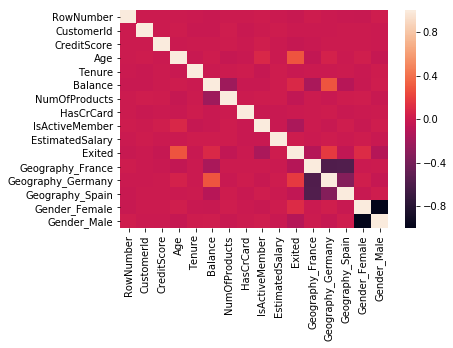

In [169]:
corr = df.corr()
sb.heatmap(corr)

In [170]:
df.shape

(10000, 16)

In [171]:
print (corr['Exited'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['Exited'].sort_values(ascending=False)[-10:])

Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Gender_Female        0.106512
Balance              0.091143
EstimatedSalary      0.012097
CustomerId          -0.006248
HasCrCard           -0.007138
Tenure              -0.009989
RowNumber           -0.016571
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Geography_France    -0.104955
Gender_Male         -0.106512
Name: Exited, dtype: float64 

----------------------
CustomerId         -0.006248
HasCrCard          -0.007138
Tenure             -0.009989
RowNumber          -0.016571
CreditScore        -0.027094
NumOfProducts      -0.047820
Geography_Spain    -0.052667
Geography_France   -0.104955
Gender_Male        -0.106512
IsActiveMember     -0.156128
Name: Exited, dtype: float64


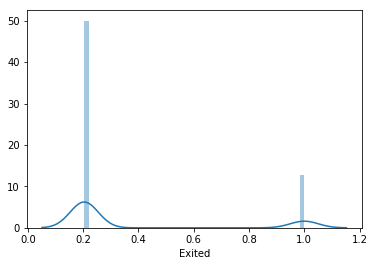

In [172]:
# displot label
sb.distplot(df['Exited'])


In [173]:
# drop unwanted col
df.drop(columns=["RowNumber", "CustomerId"], inplace = True)

In [174]:
# feature scaling 
def feature_scaling(df):

    for name in df.columns:
        df[name] = (df[name] - df[name].min()) / (df[name].max()-df[name].min())
    print(df.head())
    return df

feature_scaling(df)

   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.538  0.324324  0.111111  0.294247       0.000000        1.0   
1        0.516  0.310811  0.000000  0.323876       0.000000        0.0   
2        0.304  0.324324  0.777778  0.630812       0.666667        1.0   
3        0.698  0.283784  0.000000  0.294247       0.333333        0.0   
4        1.000  0.337838  0.111111  0.492625       0.000000        1.0   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0             1.0         0.506735     1.0               1.0   
1             1.0         0.562709     0.0               0.0   
2             0.0         0.569654     1.0               1.0   
3             0.0         0.469120     0.0               1.0   
4             1.0         0.395400     0.0               0.0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                0.0              0.0            1.0          0.0  
1                0.0              

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.111111,0.294247,0.000000,1.0,1.0,0.506735,1.0,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.000000,0.323876,0.000000,0.0,1.0,0.562709,0.0,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.777778,0.630812,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.000000,0.294247,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.111111,0.492625,0.000000,1.0,1.0,0.395400,0.0,0.0,0.0,1.0,1.0,0.0
5,0.590,0.351351,0.777778,0.445059,0.333333,1.0,0.0,0.748797,1.0,0.0,0.0,1.0,0.0,1.0
6,0.944,0.432432,0.666667,0.294247,0.333333,1.0,1.0,0.050261,0.0,1.0,0.0,0.0,0.0,1.0
7,0.052,0.148649,0.333333,0.450283,1.000000,1.0,0.0,0.596733,1.0,0.0,1.0,0.0,1.0,0.0
8,0.302,0.351351,0.333333,0.559555,0.333333,0.0,1.0,0.374680,0.0,1.0,0.0,0.0,0.0,1.0
9,0.668,0.121622,0.111111,0.529420,0.000000,1.0,1.0,0.358605,0.0,1.0,0.0,0.0,0.0,1.0


In [175]:
# seperate data set
def features(df):
    output = df.Exited 
#     y.head()
    df = df.drop('Exited', axis = 1)
    print("Seperate Target column from dataset")
    return df, output
df, output = features(df)

Seperate Target column from dataset


In [176]:
def split_data(df):
    # 70 % training datset
    train_per = int(0.70*len(df))
    print("Train dataset:", train_per)
    # 30% test dataset
    test_per = len(df)-train_per
    print("Test dataset:", test_per)
    
    print("\nConvert pandas datafrem into numpy")
    x_train_data = np.array(df[:train_per])   
    x_test_data  = np.array(df[:test_per])
    
    
    train_per_y = int(0.70*len(output))
    test_per_y = len(output)-train_per_y

    
    y_train_data = np.array(output[:train_per_y])
    y_test_data = np.array(output[:test_per_y])
    
   
    y_test_data = y_test_data.reshape(-1,1)
    y_train_data = y_train_data.reshape(-1,1)
        
    
    print("\nX train data shape:", x_train_data.shape)
    print("y train data shape:", y_train_data.shape)
    print("\nX test data shape:", x_test_data.shape)
    print("y test data shape:", y_test_data.shape)

    return x_train_data, y_train_data, x_test_data, y_test_data

x_train_data, y_train_data, x_test_data, y_test_data = split_data(df)        

Train dataset: 7000
Test dataset: 3000

Convert pandas datafrem into numpy

X train data shape: (7000, 13)
y train data shape: (7000, 1)

X test data shape: (3000, 13)
y test data shape: (3000, 1)


In [178]:
class MultiNeuralNetwork:

    def __init__(self):
        # Learning Rate
        self.l_rate = 0.001
        # Total iterations
        self.echops = 2000

    #Defing a function to train our data
    def train(self, x_train_data, y_train_data):

        layers = [x_train_data.shape[1], 50, 44, 65, 1]
        z = 0
        weight = []
        baised = []
        a = [0] * len(layers)
        z = [0] * len(layers)
        dg = [0] * len(layers)
        da = [0] * len(layers)
        dz = [0] * len(layers)
        db = [0] * len(layers)
        dw = [0] * len(layers)
        
        a[0] = x_train_data.T 
        m = len(x_train_data.shape)
        n = x_train_data.shape[1]

        for j in range(1, len(layers)):
            
            weight.append(np.random.rand(layers[j], layers[j-1]) * 0.001 ) 
            baised.append(np.zeros(((layers[j], 1)) ))
 
        for k in range(self.echops):

            for i in range(len(layers) - 1):
                
        
                z[i] = np.dot(weight[i], a[i]) + baised[i]
                
                
                a[i+1] = 1 / (1 + np.exp(-z[i]))
                

                # d_g = a * (1 - a)
                dg[i] = (1 / (1 + np.exp(-z[i]))) * (1 - (1 / (1 + np.exp(-z[i]))))
                

                # Loss Funtion
                # da = -(y/a) + ((1-y)/(1-a))
                da[i] = (-(y_train_data.T / a[i+1]) + ((1 - y_train_data.T) / (1 - a[i+1])))
                

                # dz = da * d_g
                dz[i] = (da[i] * dg[i])
                

                #dw = (dz * a) / m
                dw[i] = np.dot(dz[i], a[i].T) / m
               

                # db = np.sum(dz)
                db[i] = np.sum(dz[i], axis=1, keepdims=True) / m
                

                # w = w - alpha * dw
                # b = b - alpha * db
                weight[i] =  weight[i] - np.dot(self.l_rate, dw[i]) 
                baised[i] = baised[i] - np.dot(self.l_rate, db[i])
                
                
                
        print("shape of Z", z[i].shape)
        print("shape of a[i+1]", a[i+1].shape)
        print("shape of dg[i]", dg[i].shape)
        print("shape of da[i]", da[i].shape)
        print("shape of dz[i]", dz[i].shape)
        print("shape of dw[i]", dw[i].shape)
        print("shape of db[i]", db[i].shape)
        print("shape of weight[i]", weight[i].shape)
        print("shape of baised[i]", baised[i].shape)
            

        return [weight, baised]
    
    def predict(self, x_test_data, parameters):

        a = [0] * 6
        a[0] = x_test_data.T
        z = [0] * 6
        a = [0] * 6
        for i in range(4):  
            z[i] = np.dot(parameters[0][i], a[i]) + parameters[1][i]
            a[i+1] = 1 / (1 + np.exp(-z[i])) 
        return a[-1]
        return y_predict

    def accuracy(self, y_data_test, y_pred_test):

        y_pred_test = np.nan_to_num(y_pred_test)
    
        test_accuracy = 100 - (np.mean(np.abs(y_pred_test - y_data_test)) * 100)        
        return test_accuracy


def main(x_train_data,y_train_data,x_test_data,y_test_data):

    #creating object for class
    obj = MultiNeuralNetwork()
    

    
    
    parameters = obj.train(x_train_data, y_train_data)
    
    y_prediction = obj.predict(x_test_data, parameters)
    
    y_prediction_train = obj.predict(x_train_data, parameters)
    
    accuracy = obj.accuracy(y_test_data, y_prediction)
    accuracy_train = obj.accuracy(y_train_data, y_prediction_train)

    print("Train accuracy: ", accuracy_train)
    print("Test accuracy: ", accuracy)

main(x_train_data,y_train_data,x_test_data,y_test_data)

shape of Z (1, 7000)
shape of a[i+1] (1, 7000)
shape of dg[i] (1, 7000)
shape of da[i] (1, 7000)
shape of dz[i] (1, 7000)
shape of dw[i] (1, 65)
shape of db[i] (1, 1)
shape of weight[i] (1, 65)
shape of baised[i] (1, 1)
Train accuracy:  79.38571428571429
Test accuracy:  78.93333333333334
